<a href="https://colab.research.google.com/github/ALjabriOmars/COMP30043-Machine-Intelligence-Systems--Assignment/blob/main/BrainStroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Download**

In [1]:
def install_and_download_dataset():
    import kagglehub
    path = kagglehub.dataset_download("jillanisofttech/brain-stroke-dataset")
    return path

dataset_path = install_and_download_dataset()
print("Dataset path:", dataset_path)

100%|██████████| 47.2k/47.2k [00:00<00:00, 5.83MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/jillanisofttech/brain-stroke-dataset/versions/1


# **2. Data Loading**

In [2]:
def load_dataset(path):
    import pandas as pd
    csv_path = path + "/brain_stroke.csv"
    dataframe = pd.read_csv(csv_path)
    return dataframe

df = load_dataset(dataset_path)
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


# **3. Initial Data Exploration**

In [3]:
def explore_dataset(df):
    print("Data Info:")
    print(df.info())

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nStatistical Summary:")
    print(df.describe(include='all'))

explore_dataset(df)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None

Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose

# **4. Data Visualizations**

## **4.1 Box Plots for Numeric Variables**

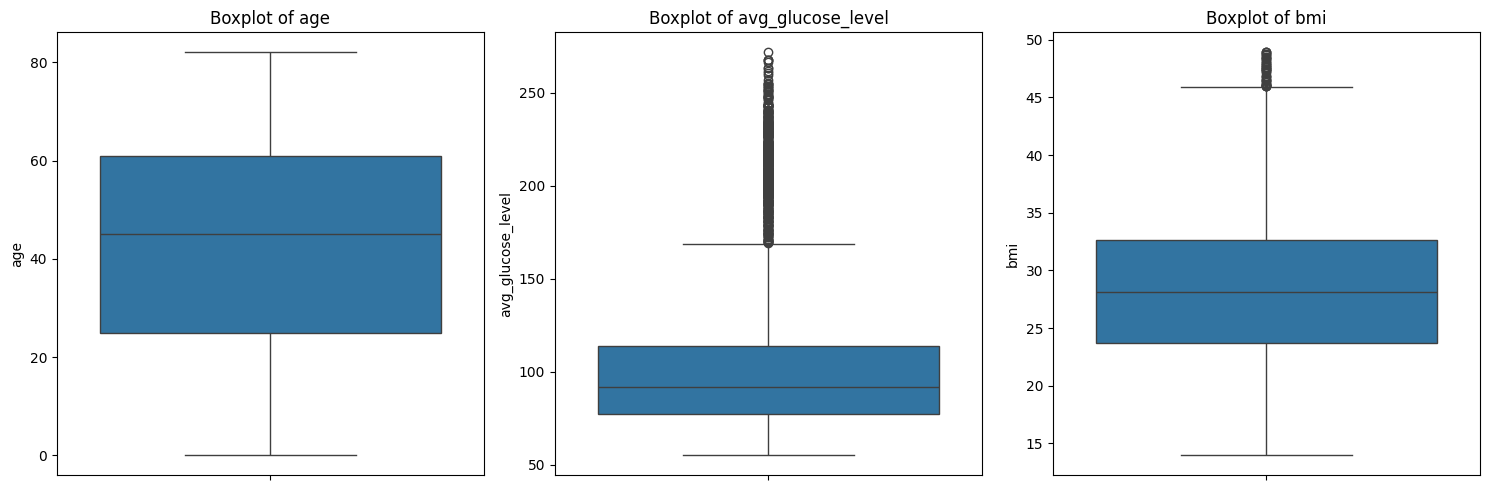

In [4]:
def plot_boxplots(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    numeric_cols = ['age', 'avg_glucose_level', 'bmi']
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numeric_cols):
        plt.subplot(1, 3, i+1)
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plot_boxplots(df)

## **4.2 Correlation Heatmap**

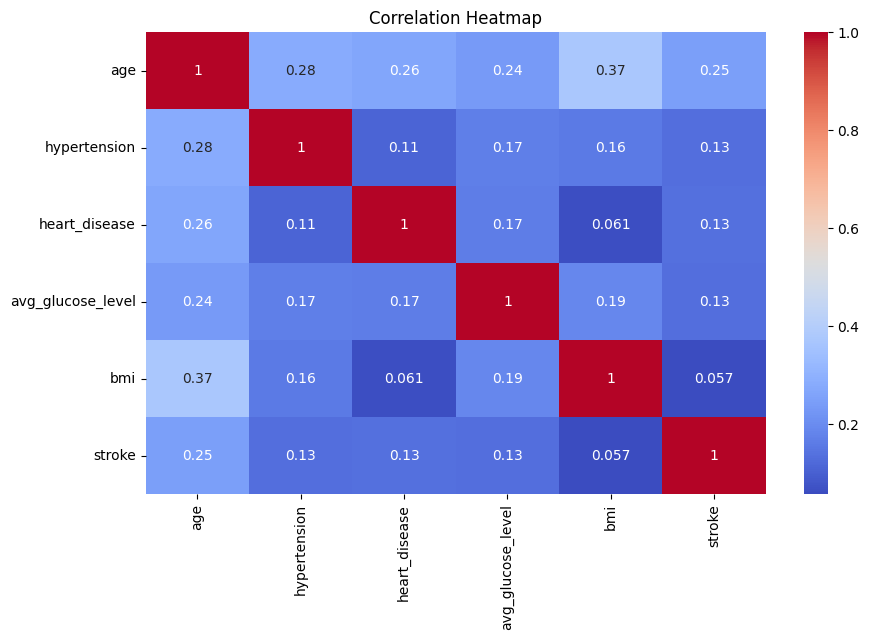

In [5]:
def plot_correlation_heatmap(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    correlation = df.corr(numeric_only=True)
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

## **4.3 Stroke Class Distribution**

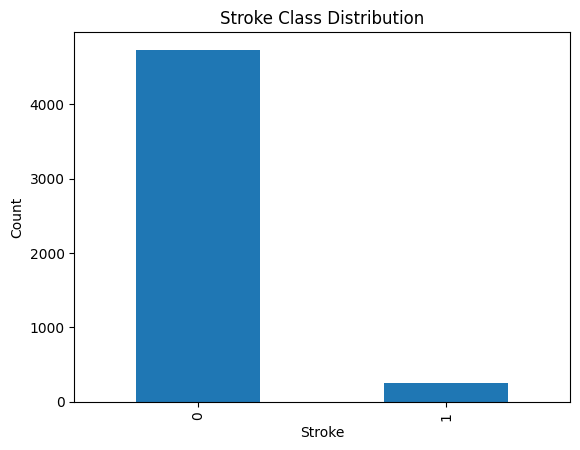

In [6]:
def plot_stroke_distribution(df):
    import matplotlib.pyplot as plt

    stroke_counts = df['stroke'].value_counts()
    stroke_counts.plot(kind='bar', title='Stroke Class Distribution')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.show()

plot_stroke_distribution(df)

# **5. Preprocessing**

In [7]:
def preprocess_data(df):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from imblearn.over_sampling import SMOTE
    import pandas as pd # Import pandas here

    if 'id' in df.columns:
        df.drop('id', axis=1, inplace=True)

    df['bmi'] = df['bmi'].fillna(df['bmi'].median())

    binary_columns = ['gender', 'ever_married', 'Residence_type']
    for column in binary_columns:
        if df[column].dtype == 'object':
            encoder = LabelEncoder()
            df[column] = encoder.fit_transform(df[column])

    df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

    X = df.drop('stroke', axis=1)
    y = df['stroke']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )

    return X, y, X_resampled, y_resampled, X_train, X_test, y_train, y_test

X, y, X_resampled, y_resampled, X_train, X_test, y_train, y_test = preprocess_data(df)

print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled.shape)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Original dataset shape: (4981, 16)
Resampled dataset shape: (9466, 16)
Training set shape: (7572, 16)
Test set shape: (1894, 16)


# **6. Decision Tree Classifier**

Decision Tree Classifier
Accuracy: 0.8078141499472017
F1 Score: 0.8205128205128205
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79       946
           1       0.77      0.88      0.82       948

    accuracy                           0.81      1894
   macro avg       0.81      0.81      0.81      1894
weighted avg       0.81      0.81      0.81      1894



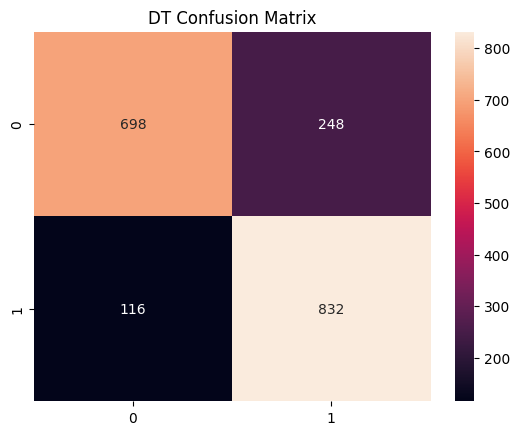

In [31]:
def decision_tree_classifier(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Decision Tree Classifier")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title("DT Confusion Matrix")
    plt.show()

    return y_pred

y_pred_dt = decision_tree_classifier(X_train, X_test, y_train, y_test)

In [23]:
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


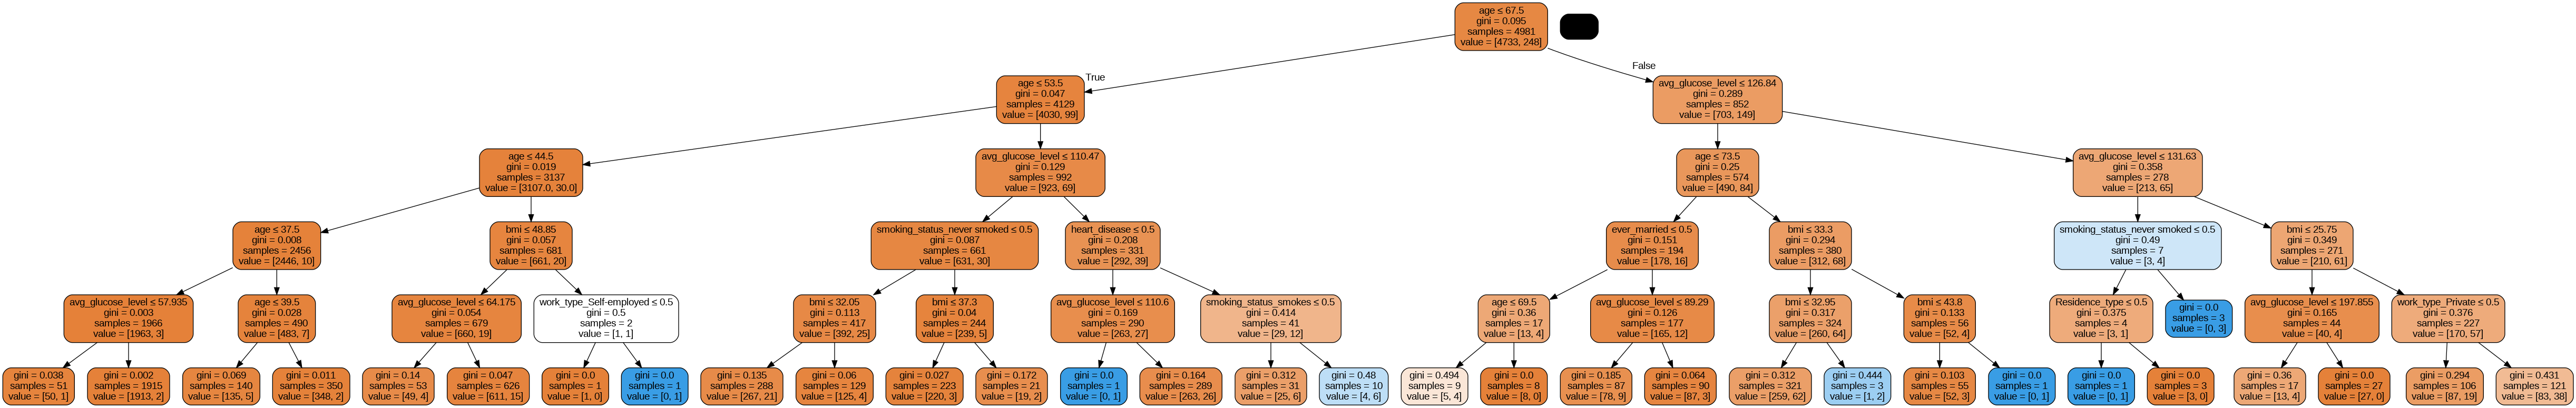

In [35]:
#  Preprocess data
df.drop(columns=["id"], inplace=True, errors='ignore')
df.dropna(inplace=True)
df = pd.get_dummies(df)
X, y = df.drop("stroke", axis=1), df["stroke"]

#  Train the model
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tree.fit(X, y)

# Export to PNG using pydotplus
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    Generate a PNG image of the decision tree.
    Requires pydotplus and Graphviz installed.
    """
    dot_data = export_graphviz(
        tree, feature_names=feature_names,
        filled=True, rounded=True, special_characters=True,
        out_file=None
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(png_file_to_save)

# Save the tree to a PNG file
tree_graph_to_png(
    tree=clf_tree,
    feature_names=X.columns.tolist(),
    png_file_to_save="stroke_decision_tree.png"
)

# Step 6: Display PNG
from IPython.display import Image
Image(filename="stroke_decision_tree.png")


# **7. K-Nearest Neighbors Classifier**

K-Nearest Neighbors Classifier
Accuracy: 0.9134107708553326
F1 Score: 0.9194499017681729
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       946
           1       0.86      0.99      0.92       948

    accuracy                           0.91      1894
   macro avg       0.92      0.91      0.91      1894
weighted avg       0.92      0.91      0.91      1894



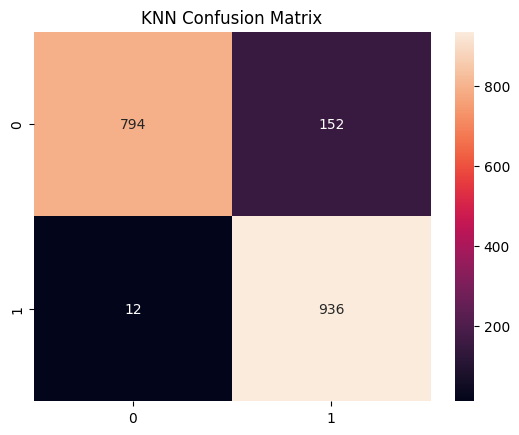

In [29]:
def knn_classifier(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("K-Nearest Neighbors Classifier")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title("KNN Confusion Matrix")
    plt.show()

    return y_pred

y_pred_knn = knn_classifier(X_train, X_test, y_train, y_test)

ROC Curve

<ipython-input-19-2ae6f036df00>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


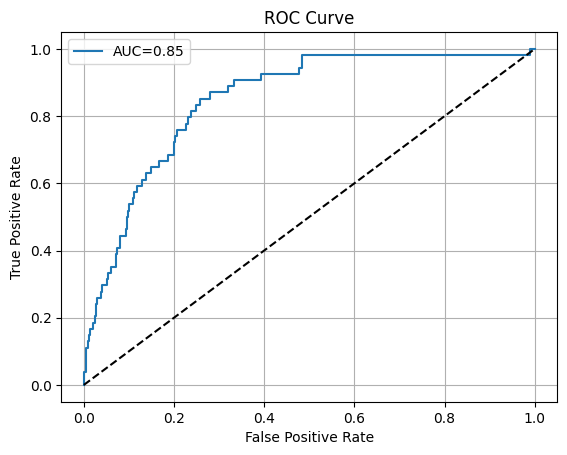

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv(install_and_download_dataset() + "/brain_stroke.csv")
df.drop('id', axis=1, inplace=True, errors='ignore')
df['bmi'].fillna(df['bmi'].median(), inplace=True)
for col in ['gender', 'ever_married', 'Residence_type']:
    df[col] = LabelEncoder().fit_transform(df[col])
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])
X = StandardScaler().fit_transform(df.drop('stroke', axis=1))
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m = LogisticRegression(max_iter=1000).fit(X_train, y_train)
fpr, tpr, _ = roc_curve(y_test, m.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC={auc(fpr, tpr):.2f}"); plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(); plt.grid(); plt.show()

# **8. Model Comparison**

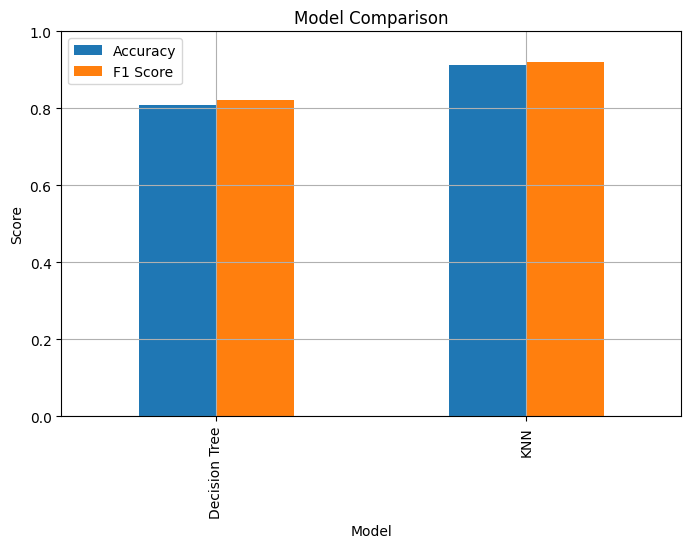

In [34]:
def compare_models(y_test, y_pred_dt, y_pred_knn):
    from sklearn.metrics import accuracy_score, f1_score
    import pandas as pd
    import matplotlib.pyplot as plt

    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    f1_dt = f1_score(y_test, y_pred_dt)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    f1_knn = f1_score(y_test, y_pred_knn)

    results_df = pd.DataFrame({
        'Model': ['Decision Tree', 'KNN'],
        'Accuracy': [accuracy_dt, accuracy_knn],
        'F1 Score': [f1_dt, f1_knn]
    })

    results_df.set_index('Model').plot(kind='bar', figsize=(8, 5), legend=True, title="Model Comparison")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

compare_models(y_test, y_pred_dt, y_pred_knn)